# LoRA fine-tuning for Stable Diffusion using D🧨ffusers

## 1. Imports and dependencies

In [ ]:
!pip install -U -qq git+https://github.com/huggingface/diffusers.git
!pip install -qq accelerate transformers ftfy
!pip install -U -qq --pre triton
!pip install -U -qq xformers
!pip install -U -qq datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.

Unzip repository

In [ ]:
!unzip diffusion-for-medical-imagery.zip -d .
!find diffusion-for-medical-imagery -maxdepth 1 -exec mv {} /content \;
!rmdir diffusion-for-medical-imagery

Archive:  diffusion-for-medical-imagery.zip
   creating: ./diffusion-for-medical-imagery/
   creating: ./diffusion-for-medical-imagery/demo/
   creating: ./diffusion-for-medical-imagery/core/
  inflating: ./diffusion-for-medical-imagery/LICENSE  
  inflating: ./diffusion-for-medical-imagery/requirements.txt  
  inflating: ./diffusion-for-medical-imagery/dev-requirements.txt  
  inflating: ./diffusion-for-medical-imagery/dev-requirements.in  
  inflating: ./diffusion-for-medical-imagery/.gitignore  
   creating: ./diffusion-for-medical-imagery/.git/
   creating: ./diffusion-for-medical-imagery/data/
   creating: ./diffusion-for-medical-imagery/notebooks/
  inflating: ./diffusion-for-medical-imagery/requirements.in  
  inflating: ./diffusion-for-medical-imagery/demo/sd_app.py  
  inflating: ./diffusion-for-medical-imagery/demo/__init__.py  
  inflating: ./diffusion-for-medical-imagery/demo/gradio_app.py  
   creating: ./diffusion-for-medical-imagery/core/settings/
  inflating: ./diffusio

In [ ]:
import os
import sys

from PIL import Image

In [ ]:
from core.base_objects import ConceptType
from core.training.lora.lora import LoRATrainer
from core.utils import (
    load_json,
    show_image_grid,
    store_images_from_urls,
    CONCEPTS_FOLDER,
)

## 2. Store images

In [ ]:
# Parameters
concept_name = "cat_toy"
what_to_teach = ConceptType.OBJECT  # ["object", "style"]
placeholder_token = "<cat-toy>"
initializer_token = "toy"  # A word that can summarise what your new concept is, to be used as a starting point

In [ ]:
# Store images
finetuning_images = [
    "https://huggingface.co/datasets/valhalla/images/resolve/main/2.jpeg",
    "https://huggingface.co/datasets/valhalla/images/resolve/main/3.jpeg",
    "https://huggingface.co/datasets/valhalla/images/resolve/main/5.jpeg",
    "https://huggingface.co/datasets/valhalla/images/resolve/main/6.jpeg",
]

store_images_from_urls(finetuning_images, concept_name=concept_name)

['data/concepts/cat_toy/0.jpeg',
 'data/concepts/cat_toy/1.jpeg',
 'data/concepts/cat_toy/2.jpeg',
 'data/concepts/cat_toy/3.jpeg']

In [ ]:
# Check images
images = []
concept_path = f"{CONCEPTS_FOLDER}/{concept_name}"
for file_path in os.listdir(concept_path):
    try:
        image_path = os.path.join(concept_path, file_path)
        images.append(Image.open(image_path).resize((512, 512)))
    except Exception:
        print(
            f"{image_path} is not a valid image, please make sure to remove this file from the directory otherwise the training could fail."
        )

show_image_grid(images, 4, len(images))

Output hidden; open in https://colab.research.google.com to view.

## 3. Training


### 3.1 Initialize trainer

In [ ]:
trainer = LoRATrainer(
    concept_name=concept_name
)

In [ ]:
trainer.train()

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Steps:   0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/xformers/ops/fmha/flash.py:339: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  and inp.query.storage().data_ptr() == inp.key.storage().data_ptr()
Steps: 100%|██████████| 2000/2000 [41:37<00:00,  1.24s/it, lr=0.002, step_loss=0.286]

TypeError: ignored

## 4. Model inference

In [ ]:
from diffusers import DiffusionPipeline
import torch

In [ ]:
weight_dtype = torch.float16
device = torch.device("cuda")
seed = 423

model_id = "CompVis/stable-diffusion-v1-4"
output_dir = "data/output/lora"

n_images_per_batch = 1
n_batches = 1
prompt = "A picture of a <cat-toy> in a swimming pool"

In [ ]:
# Load previous pipeline
pipeline = DiffusionPipeline.from_pretrained(
    model_id, torch_dtype=weight_dtype
)
pipeline = pipeline.to(device)

# Load attention processors
pipeline.unet.load_attn_procs(output_dir)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
# Run inference
generator = torch.Generator(device=device)
generator = generator.manual_seed(seed)

images = []
for _ in range(n_batches):
    images.extend(
        pipeline(
            [prompt] * n_images_per_batch,
            num_inference_steps=50,
            generator=generator
        ).images
    )


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# Inference steps: 30
for image in images:
  display(image)

In [ ]:
# Inference steps: 50
for image in images:
  display(image)

In [ ]:
# Inference steps: 100
for image in images:
  display(image)

In [ ]:
# Inference steps: 200
for image in images:
  display(image)

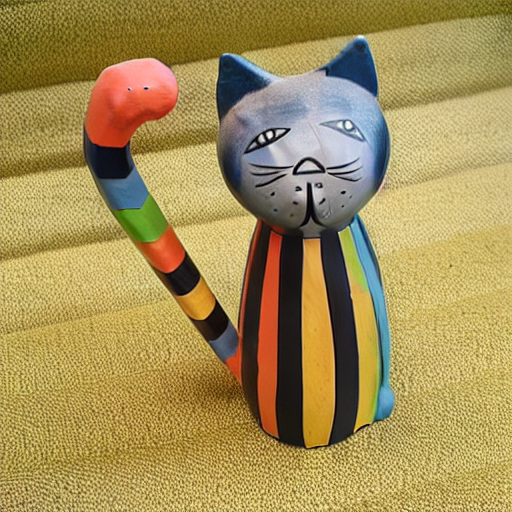

In [ ]:
# Inference steps: 200 + Swimming Pool
for image in images:
  display(image)